In [1]:
import pandas as pd
import seaborn as sns
import zipfile

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,7,29,31,32,43,48,50,51,52,53,54,77,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


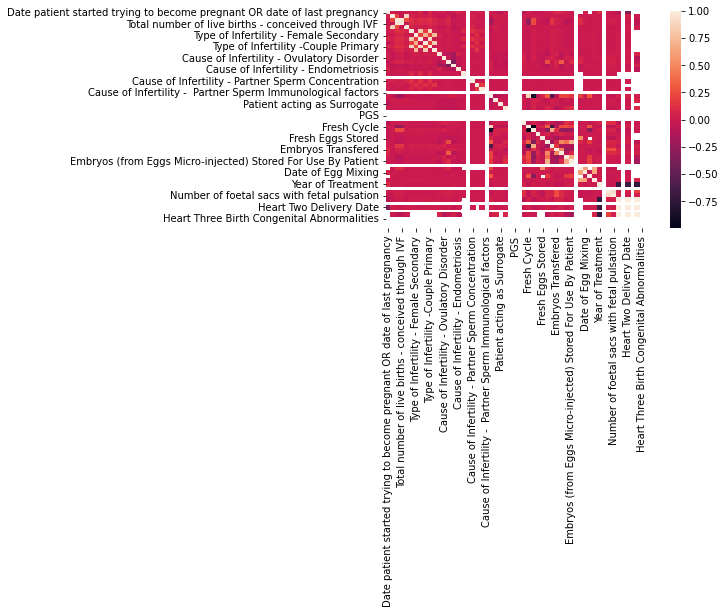

In [2]:
sns.heatmap(df.corr())

In [3]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


In [4]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

print('Number of columns :', len(col_mod))
print(mod_df.columns)

Number of columns : 95
Number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovul

In [5]:
# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [7]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
# obtaining the shape and size of mod_df after removing more columns 
print(mod_df.shape)
mod_df.columns

(158519, 27)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Inf